In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats

## Mental Health in the Workplace

Over the last few years, mental health has come to the forefront in daily conversation and popular media. Whether the saliency of this issue is due to a wealth and abundance which allows our society the luxury to explore these problems, or whether the problem of mental health itself has been elevated as a direct result of our overstimulated and consumer driven world, is not quite uncertain.

What is certain however, is that mental health and wellbeing do have a direct and critical impact on employee productivity. Today we'll offer some exploratory ideas pulled from correlational relationships in survey data that companies and individuals should consider implementing to best address these concerns in the workplace.`

In [2]:
dataset = pd.read_csv('/Users/Albert/Thinkful Lessons/Challenge/survey.csv')
dataset

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


First we have to determine how we are identifying individuals with a mental health concern. Because mental health operates on a spectrum, can be difficult to diagnose, and is often an internal sense of wellbeing, we will use indicators of subjective wellbeing as a measure of mental health.

In this case, we create a new column **Mental Health Concern** which returns Yes if the person surveyed has either received treatment or has reported that mental health Often gets in the way of work.

In [3]:
dataset['Mental Health Concern'] = (dataset['treatment']=='Yes') | (dataset['work_interfere']=='Often')
dataset['Mental Health Concern']

0        True
1       False
2       False
3        True
4       False
5       False
6        True
7       False
8        True
9       False
10       True
11      False
12       True
13      False
14      False
15       True
16       True
17       True
18      False
19      False
20       True
21      False
22       True
23       True
24       True
25       True
26      False
27       True
28       True
29      False
        ...  
1229    False
1230     True
1231     True
1232     True
1233     True
1234     True
1235     True
1236     True
1237    False
1238     True
1239    False
1240     True
1241     True
1242     True
1243     True
1244    False
1245     True
1246    False
1247     True
1248     True
1249     True
1250     True
1251     True
1252     True
1253    False
1254     True
1255     True
1256     True
1257    False
1258     True
Name: Mental Health Concern, Length: 1259, dtype: bool

## Self Employment's Impact

Next, we'd like to see how self-employed individuals fare vs. their counterparts.

In [4]:
self_empl_health = dataset.groupby('self_employed').mean()
del self_empl_health['Age']
self_empl_health

,Mental Health Concern
self_employed,
No,0.519635
Yes,0.547945


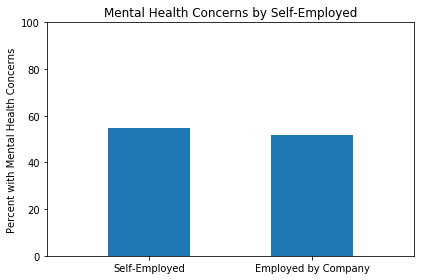

In [5]:
objects = ('Self-Employed','Employed by Company')
x_pos = np.arange(len(objects))
perct_with_health_concern = (54.8,51.9)

plt.bar(x_pos, perct_with_health_concern, width=.5, align='center')
plt.xticks(x_pos, objects)
plt.ylim([0, 100])
plt.margins(.25)
plt.ylabel('Percent with Mental Health Concerns')
plt.title('Mental Health Concerns by Self-Employed')

plt.tight_layout()
plt.show()

Interesting to note that there is a slight difference between the 2, with 55% of self-employed indivduals as opposed to 52% of company employed individuals reporting some concerns with mental health wellbeing.

This trend is similar although significantly smaller when comparing remote workers as well, indicating that there is some truth to the idea that loneliness can excacerbate these problems.

In [6]:
remote_work_health = dataset[dataset['self_employed']!='Yes'].groupby('remote_work').mean()
del remote_work_health['Age']
remote_work_health

,Mental Health Concern
remote_work,
No,0.516091
Yes,0.529197


## What Can Companies Do

What exactly is it about working in a company, particularly in the office, that can help improve individuals' sense of wellbeing?

We will look at 2 different types of ways a company can contribute:

1) Access to Care

2) Social Support

### Access to Care

There are a number of metrics in the survey that are indicative of a company's emphasis on access to mental health care. We will aggregate the following:

- benefits
- care_options
- wellness-program
- seek_help
- leave

We will use a 1/0 scale to represent Yes or No responses for the first 4, including Do Not Know as a False reponse (this is following the assumption that in order for companies to run effective programs employees must be aware)

leave will be evaluated on a 0, .25, .5, .75 and 1 scale



In [7]:
dataset['benefits'] = dataset['benefits'].replace('Yes', 1)
dataset['benefits'] = dataset['benefits'].replace('No', 0)
dataset['benefits'] = dataset['benefits'].replace('Don\'t know', 0)

In [8]:
dataset['care_options'] = dataset['care_options'].replace('Yes', 1)
dataset['care_options'] = dataset['care_options'].replace('No', 0)
dataset['care_options'] = dataset['care_options'].replace(dataset.loc[0,'care_options'], 0)

In [9]:
dataset['wellness_program'] = dataset['wellness_program'].replace('Yes', 1)
dataset['wellness_program'] = dataset['wellness_program'].replace('No', 0)
dataset['wellness_program'] = dataset['wellness_program'].replace('Don\'t know', 0)

In [10]:
dataset['seek_help'] = dataset['seek_help'].replace('Yes', 1)
dataset['seek_help'] = dataset['seek_help'].replace('No', 0)
dataset['seek_help'] = dataset['seek_help'].replace('Don\'t know', 0)

In [11]:
dataset['leave'] = dataset['leave'].replace('Very easy', 1)
dataset['leave'] = dataset['leave'].replace('Somewhat easy', .75)
dataset['leave'] = dataset['leave'].replace('Don\'t know', 0.5)
dataset['leave'] = dataset['leave'].replace('Somewhat difficult', 0.25)
dataset['leave'] = dataset['leave'].replace('Very difficult', 0)

In [12]:
dataset['Access to Care Aggregator'] = (dataset['leave'] + dataset['seek_help'] + dataset['wellness_program'] + dataset['care_options'] + dataset['benefits']) / 5
dataset['Access to Care Aggregator']

0       0.55
1       0.10
2       0.05
3       0.25
4       0.30
5       0.30
6       0.05
7       0.30
8       0.40
9       0.10
10      0.10
11      0.10
12      0.45
13      0.10
14      0.15
15      0.35
16      0.20
17      0.50
18      0.60
19      0.35
20      0.45
21      0.05
22      0.50
23      0.10
24      0.50
25      0.60
26      0.10
27      0.50
28      0.05
29      0.00
        ... 
1229    0.10
1230    0.60
1231    0.10
1232    1.00
1233    0.30
1234    0.10
1235    0.70
1236    0.35
1237    0.30
1238    0.95
1239    0.10
1240    0.15
1241    0.15
1242    0.10
1243    0.70
1244    0.10
1245    0.90
1246    0.55
1247    0.00
1248    0.30
1249    0.60
1250    0.70
1251    0.35
1252    0.70
1253    0.55
1254    0.15
1255    0.45
1256    0.45
1257    0.30
1258    0.50
Name: Access to Care Aggregator, Length: 1259, dtype: float64

In [13]:
access_to_care = dataset.groupby('Access to Care Aggregator').mean()
pd.DataFrame(access_to_care['Mental Health Concern'])

,Mental Health Concern
Access to Care Aggregator,
0.00,0.666667
0.05,0.619048
0.10,0.342373
0.15,0.368932
0.20,0.454545
0.25,0.695652
0.30,0.549020
0.35,0.507463
0.40,0.586957


(array([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  3.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.]),
 <a list of 10 Patch objects>)

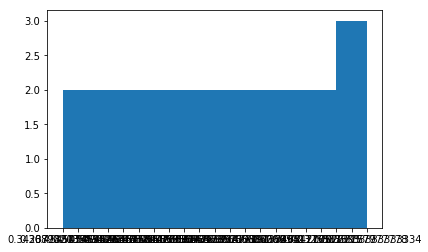

In [14]:
plt.hist(pd.DataFrame(access_to_care['Mental Health Concern']), 10)

### Social Support

Similarly, there are also metrics in the survey that are indicative of the security and support a company's social environment can provide. We will aggregate the following to represent this:

- coworkers
- supervisor
- mental_vs_physical
- obs_consequence

We will use a similar 1/0 scale to represent Yes or No/Don't Know responses. We will ascribe a .5 value to all responses Some of them.

In [15]:
dataset['supervisor'] = dataset['supervisor'].replace('Yes', 1)
dataset['supervisor'] = dataset['supervisor'].replace('Some of them', 0.5)
dataset['supervisor'] = dataset['supervisor'].replace('No', 0)

In [16]:
dataset['coworkers'] = dataset['coworkers'].replace('Yes', 1)
dataset['coworkers'] = dataset['coworkers'].replace('Some of them', 0.5)
dataset['coworkers'] = dataset['coworkers'].replace('No', 0)

In [17]:
dataset['mental_vs_physical'] = dataset['mental_vs_physical'].replace('Yes', 1)
dataset['mental_vs_physical'] = dataset['mental_vs_physical'].replace('Don\'t know', 0)
dataset['mental_vs_physical'] = dataset['mental_vs_physical'].replace('No', 0)

In [18]:
dataset['obs_consequence'] = dataset['obs_consequence'].replace('Yes', 0)
dataset['obs_consequence'] = dataset['obs_consequence'].replace('No', 1)

In [19]:
dataset['Social Support'] = (dataset['supervisor'] + dataset['coworkers'] + dataset['mental_vs_physical'] + dataset['obs_consequence']) / 4
dataset['Social Support']

0       0.875
1       0.250
2       0.750
3       0.125
4       0.625
5       0.750
6       0.375
7       0.250
8       0.750
9       1.000
10      0.625
11      0.750
12      0.500
13      0.750
14      0.750
15      0.625
16      0.375
17      0.625
18      0.750
19      0.500
20      0.500
21      0.750
22      0.625
23      0.250
24      0.750
25      0.625
26      0.375
27      1.000
28      0.375
29      0.375
        ...  
1229    0.250
1230    1.000
1231    0.250
1232    1.000
1233    0.750
1234    0.250
1235    0.625
1236    0.375
1237    0.000
1238    0.375
1239    0.750
1240    0.375
1241    0.375
1242    0.250
1243    0.625
1244    0.625
1245    0.250
1246    0.375
1247    0.125
1248    0.250
1249    1.000
1250    0.875
1251    0.875
1252    0.375
1253    0.500
1254    0.500
1255    0.875
1256    0.250
1257    0.250
1258    0.375
Name: Social Support, Length: 1259, dtype: float64

In [20]:
social_support = dataset.groupby('Social Support').mean()
social_support

,Age,benefits,care_options,wellness_program,seek_help,leave,coworkers,supervisor,mental_vs_physical,obs_consequence,Mental Health Concern,Access to Care Aggregator
Social Support,,,,,,,,,,,,
0.000,3.225806e+09,0.193548,0.548387,0.161290,0.225806,0.306452,0.000000,0.000000,0.000000,0.000000,0.451613,0.287097
0.125,3.394444e+01,0.388889,0.333333,0.194444,0.194444,0.347222,0.444444,0.055556,0.000000,0.000000,0.777778,0.291667
0.250,2.336946e+01,0.379310,0.305419,0.128079,0.142857,0.445813,0.123153,0.123153,0.009852,0.743842,0.571429,0.280296
0.375,3.318000e+01,0.390000,0.315000,0.135000,0.155000,0.500000,0.430000,0.235000,0.015000,0.820000,0.560000,0.299000
0.500,3.228037e+01,0.331776,0.331776,0.121495,0.140187,0.574766,0.467290,0.500000,0.098131,0.934579,0.504673,0.300000
0.625,3.200000e+01,0.350962,0.278846,0.182692,0.177885,0.602163,0.507212,0.834135,0.187500,0.971154,0.418269,0.318510
0.750,3.041558e+01,0.383117,0.396104,0.240260,0.220779,0.629870,0.811688,0.824675,0.422078,0.941558,0.551948,0.374026
0.875,3.242742e+01,0.524194,0.508065,0.362903,0.403226,0.737903,0.528226,0.971774,1.000000,1.000000,0.483871,0.507258
1.000,3.167416e+01,0.382022,0.415730,0.202247,0.280899,0.778090,1.000000,1.000000,1.000000,1.000000,0.539326,0.411798


## Gauging Impact

Now that we've aggregated the numbers we need to represent both a company's commitment to providing access to care for mental health issues (Access to Care), and the availability of social support from managers and coworkers (Social Support), it's time to see whether they have an impact on an employees sense of mental health and wellbeing (Mental Health Concern).

We'll plot each variable in a scatter plot, drawing a regression line to determine the relationship between the two.

Text(0.04,0.96,'R-Value = -0.315\nSlope = -1.045')

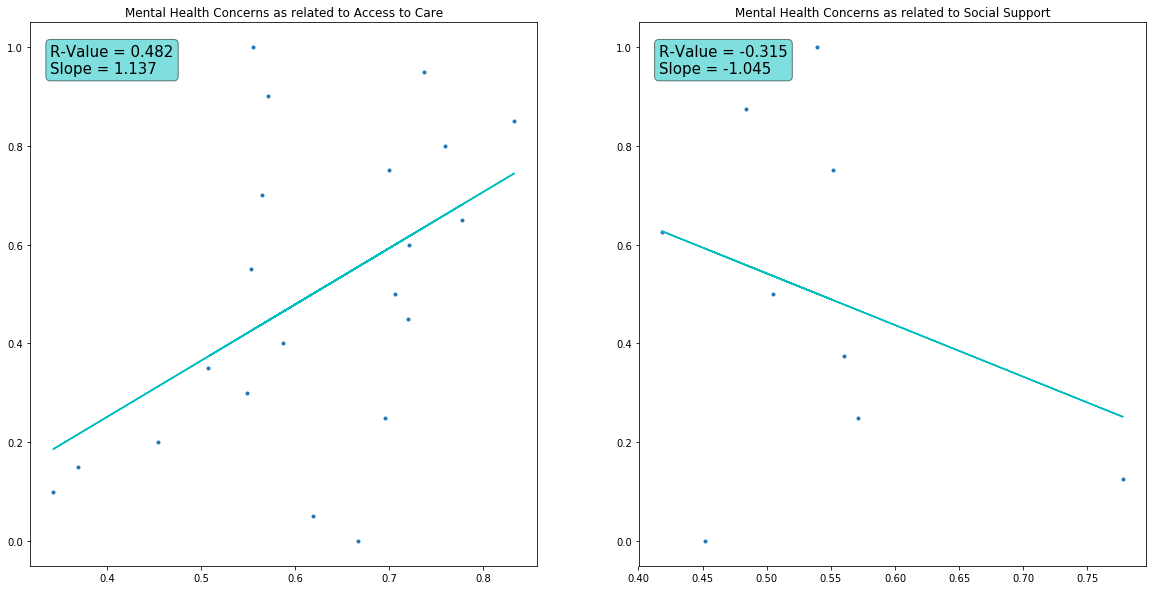

In [21]:
plt.figure(figsize=(20,10))

x1 = access_to_care['Mental Health Concern']
y1 = access_to_care.index.values
x2 = social_support['Mental Health Concern']
y2 = social_support.index.values

m1, b1 = np.polyfit(x1, y1, 1)
m2, b2 = np.polyfit(x2, y2, 1)
rvalue1 = stats.linregress(access_to_care['Mental Health Concern'], access_to_care.index.values).rvalue
rvalue2 = stats.linregress(social_support['Mental Health Concern'], social_support.index.values).rvalue

box_props = dict(boxstyle='round', facecolor='c', alpha=0.5)

ax1 = plt.subplot(1, 2, 1)
plt.plot(x1, y1, '.')
plt.plot(x1, m1*x1 + b1, '-', color='c')
plt.title('Mental Health Concerns as related to Access to Care')
plt.text(0.04, .96, 'R-Value = {:.3f}\nSlope = {:.3f}'.format(rvalue1,m1), transform=ax1.transAxes, fontsize=15, verticalalignment='top', bbox=box_props)

ax2 = plt.subplot(1, 2, 2)
plt.plot(x2, y2, '.')
plt.plot(x2, m2*x2 + b2, '-', color='c')
plt.title('Mental Health Concerns as related to Social Support')
plt.text(0.04, .96, 'R-Value = {:.3f}\nSlope = {:.3f}'.format(rvalue2,m2), transform=ax2.transAxes, fontsize=15, verticalalignment='top', bbox=box_props)

When we analyze correlational data, we see that Mental Health Concerns tend to decrease both when a company provides more access to care and when there is more Social Support for an individual within the company.

Understandably, there are a lot of caveats to the data. For one, the R-Value for Social Support is somewhat low. Outliers may be skewing the relationship, or perhaps there is a lack of sufficient data to properly evaluate the relationship. There can also be questions raised as to the methodology here, as aggregating multiple variables into a single representative variable can mask underlying relationships at play.

Nevertheless, there is some meat here as far as a cursory analysis is concerned. It's obvious that, at minimum, there are benefits to employee wellbeing when proper access to mental health care is provided by a company. Additional avenues of inquiry that could produce interesting results would be:

- Diving into which specific variable out of all the aggregated ones has the strongest correlation, helping drive towards more tangible and substantive policy implementations
- Exploring company policies regarding mental health as they relate to growth and productivity metrics

In [24]:
del social_support['Age']
social_support.corr()

,benefits,care_options,wellness_program,seek_help,leave,coworkers,supervisor,mental_vs_physical,obs_consequence,Mental Health Concern,Access to Care Aggregator
benefits,1.000000,-0.131566,0.660600,0.513966,0.615441,0.470423,0.528517,0.586901,0.541642,0.227120,0.693966
care_options,-0.131566,1.000000,0.541497,0.729247,0.053548,-0.092884,0.102013,0.449978,-0.264545,-0.291486,0.505769
wellness_program,0.660600,0.541497,1.000000,0.923333,0.539897,0.385263,0.616062,0.763831,0.230610,-0.084895,0.908361
seek_help,0.513966,0.729247,0.923333,1.000000,0.543831,0.339846,0.574253,0.853923,0.167863,-0.183612,0.925370
leave,0.615441,0.053548,0.539897,0.543831,1.000000,0.805066,0.957551,0.864584,0.870297,-0.357964,0.800138
coworkers,0.470423,-0.092884,0.385263,0.339846,0.805066,1.000000,0.800971,0.696972,0.589987,0.078619,0.573938
supervisor,0.528517,0.102013,0.616062,0.574253,0.957551,0.800971,1.000000,0.838912,0.791444,-0.419774,0.796302
mental_vs_physical,0.586901,0.449978,0.763831,0.853923,0.864584,0.696972,0.838912,1.000000,0.540278,-0.223913,0.945779
obs_consequence,0.541642,-0.264545,0.230610,0.167863,0.870297,0.589987,0.791444,0.540278,1.000000,-0.458927,0.507191
Mental Health Concern,0.227120,-0.291486,-0.084895,-0.183612,-0.357964,0.078619,-0.419774,-0.223913,-0.458927,1.000000,-0.230163
